# **Seattle Crime Exploratory Data Analysis**
**Author**: Matthew Lee\
**Date**: 25 September 2024\
**Project Description**:  
This project explores Seattle's crime data using records from the Seattle Police Department from 2008. The objective is to clean the data, perform exploratory data analysis (EDA), and identify key patterns and trends.

[Data source: SPD Crime Data 2008-Present](https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5/about_data)
___
## **Table of Contents**
1. [Project Setup](#Project-Setup)  
   1.1 [Importing Libraries](#Importing-Libraries)  
   1.2 [Loading the Data](#Loading-the-Data)  [Data Cleaning](#Data-Cleaning)
2. [Data Cleaning](#Data-Cleaning)  
   2.1 [Handling Missing Values](#Handling-Missing-Values)  
   2.2 [Removing Duplicates](#Removing-Duplicates)  
   2.3 [Converting Data Types](#Converting-Data-Types)  
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)  
   3.1 [Basic Data Summary](#Basic-Data-Summary)  
   3.2 [Offenses Over Time](#Offenses-Over-Time)  
   3.3 [Offense Types Distribution](#Offense-Types-Distribution)  
4. [Grouping and Aggregating Data](#Grouping-and-Aggregating-Data)  
   4.1 [Most Common Crime Types](#Most-Common-Offense-Types)  
   4.2 [Offenses by Neighborhood](#Offenses-by-Neighborhood)  
5. [Further Analysis](#Further-Analysis)  
   5.1 [Crime Trends Over Time](#Crime-Trends-Over-Time)  
6. [Conclusion](#Conclusion)  
   6.1 [Summary of Findings](#Summary-of-Findings)
___

## **1. Project Setup** <a id="Project-Setup"></a>

### **1.1 Importing Libraries** <a id="Importing-Libraries"></a>
Import necessary libraries: pandas, matplotlib, and seaborn

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1.2 Loading the Data** <a id="Loading-the-Data"></a>
Load the crime dataset from csv file downloaded from SPD website and display the first few rows.

In [16]:
df = pd.read_csv("./SPD_Crime_Data__2008-Present_20240925.csv")
df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


___

## **2. Data Cleaning** <a id="Data-Cleaning"></a>

### **2.1 Handling Missing Values** <a id="Handling-Missing-Values"></a>
Identify and handle missing data. 

In [17]:
df.isnull().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime      1875
Offense End DateTime      485327
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       9
Sector                         9
Beat                           9
MCPP                          29
100 Block Address          50726
Longitude                      0
Latitude                       0
dtype: int64

Here, we can see that 'Report DateTime' column has no missing data. We can utilize this for all the missing data in the 'Offense Start DateTime' column. Furthermore, 'Offense End DateTime' has the most missing data, and this make sense. Sometimes there is no end date/time for an offense. In this project, we are not going to explore too much on the end time of an offense. Therefore, we are going to fill these in with the same time as the 'Offense Start DateTime'. 

In [18]:
# Fill missing values of Offense Start DateTime with corresponding Report DateTime
df['Offense Start DateTime'] = df['Offense Start DateTime'].fillna(df['Report DateTime'])

# Fill missing values of Offense End DateTime with corresponding Offense Start DateTime
df['Offense End DateTime'] = df['Offense End DateTime'].fillna(df['Offense Start DateTime'])

# Check which columns still has missing values
df.isnull().sum()

Report Number                 0
Offense ID                    0
Offense Start DateTime        0
Offense End DateTime          0
Report DateTime               0
Group A B                     0
Crime Against Category        0
Offense Parent Group          0
Offense                       0
Offense Code                  0
Precinct                      9
Sector                        9
Beat                          9
MCPP                         29
100 Block Address         50726
Longitude                     0
Latitude                      0
dtype: int64

We can continue handling other missing datas. Next, '100 Block Address' column is not too relevant to this project, rather we will focus more on the MCPP (Micro-Community Policing Plans) for the location. As for the other missing values, I am going to fill it with the mode of the column. 

In [19]:
# Drop '100 Block Address' column
df = df.drop('100 Block Address', axis=1)

# Fill Precinct, Sector, Beat, and MCPP missing values with the mode of each corresponding column
for col in ['Precinct', 'Sector', 'Beat', 'MCPP']:
    mode_value = df[col].mode()[0]  # Get the mode of the column
    df[col] = df[col].fillna(mode_value)  # Reassign the filled values back to the column

df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193


In [20]:
# Recheck for missing values
df.isnull().sum()

Report Number             0
Offense ID                0
Offense Start DateTime    0
Offense End DateTime      0
Report DateTime           0
Group A B                 0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
Offense Code              0
Precinct                  0
Sector                    0
Beat                      0
MCPP                      0
Longitude                 0
Latitude                  0
dtype: int64

### **2.2 Removing Duplicates** <a id="Removing-Duplicates"></a>
Remove any duplicate data, if any.

In [21]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


### **2.3 Converting Data Types** <a id="Converting-Data-Types"></a>
Convert any columns with dates and times into DateTime data type.

In [22]:
# Change Offense Start DateTime, Offense End DateTime, and Report DateTime to DateTime data type
df['Offense Start DateTime'] = pd.to_datetime(df['Offense Start DateTime'], format='%m/%d/%Y %I:%M:%S %p')

# There is an incorrect data that was inputted: "Out of bounds nanosecond timestamp: 05/23/3035 09:00:00 AM"
df = df[~df['Offense End DateTime'].astype(str).str.contains('3035')]  
df['Offense End DateTime'] = pd.to_datetime(df['Offense End DateTime'], format='%m/%d/%Y %I:%M:%S %p')

# Continue to change to datetime format
df['Report DateTime'] = pd.to_datetime(df['Report DateTime'], format='%m/%d/%Y %I:%M:%S %p')

# Verify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145317 entries, 0 to 1145317
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Report Number           1145317 non-null  object        
 1   Offense ID              1145317 non-null  int64         
 2   Offense Start DateTime  1145317 non-null  datetime64[ns]
 3   Offense End DateTime    1145317 non-null  datetime64[ns]
 4   Report DateTime         1145317 non-null  datetime64[ns]
 5   Group A B               1145317 non-null  object        
 6   Crime Against Category  1145317 non-null  object        
 7   Offense Parent Group    1145317 non-null  object        
 8   Offense                 1145317 non-null  object        
 9   Offense Code            1145317 non-null  object        
 10  Precinct                1145317 non-null  object        
 11  Sector                  1145317 non-null  object        
 12  Beat               

While converting the 'Offense End DateTime' column into a datetime data type, there was an incorrect data where the date inputted is a date that has not occured (i.e. the year 3035). I have decided to drop this row to maintain data integrity and accuracy.
___

## **3. Exploratory Data Analysis (EDA)** <a id="Exploratory-Data-Analysis"></a>
In this section, we will explore the data further through numbers and plots.

### **3.1 Basic Data Summary** <a id="Basic-Data-Summary"></a>
The below shows basic data summaries of Seattle Crimes

In [26]:
total_crimes = df.shape[0]
print("Total number of crimes: ", total_crimes)

crime_types = df['Offense Parent Group'].value_counts()
print(crime_types)

Total number of crimes:  1145317
Offense Parent Group
LARCENY-THEFT                               422818
ASSAULT OFFENSES                            165723
BURGLARY/BREAKING&ENTERING                  130221
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY    107240
MOTOR VEHICLE THEFT                          79378
FRAUD OFFENSES                               63907
TRESPASS OF REAL PROPERTY                    34765
DRUG/NARCOTIC OFFENSES                       28993
ROBBERY                                      26753
DRIVING UNDER THE INFLUENCE                  20144
WEAPON LAW VIOLATIONS                        11284
FAMILY OFFENSES, NONVIOLENT                  10441
SEX OFFENSES                                  7575
STOLEN PROPERTY OFFENSES                      7550
BAD CHECKS                                    6719
COUNTERFEITING/FORGERY                        5675
PROSTITUTION OFFENSES                         4117
LIQUOR LAW VIOLATIONS                         2350
ARSON                       

### **3.2 Offenses Over Time** <a id="Offenses-Over-Time"></a>
Added Month and Year column to visualize Offenses Over Time

In [37]:
df['Year'] = df['Offense Start DateTime'].dt.year
df['Month'] = df['Offense Start DateTime'].dt.month

df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,Simplified Offense,Year,Month
0,2020-044620,12605873663,2020-02-05 10:10:00,2020-02-05 10:10:00,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,Drug/Narcotic Violations,2020,2
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,Theft of Motor Vehicle Parts or Accessories,2020,2
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,Robbery,2020,2
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,Destruction/Damage/Vandalism of Property,2020,2
4,2020-044076,12605081469,2020-02-05 00:51:21,2020-02-05 00:51:21,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,Driving Under the Influence,2020,2


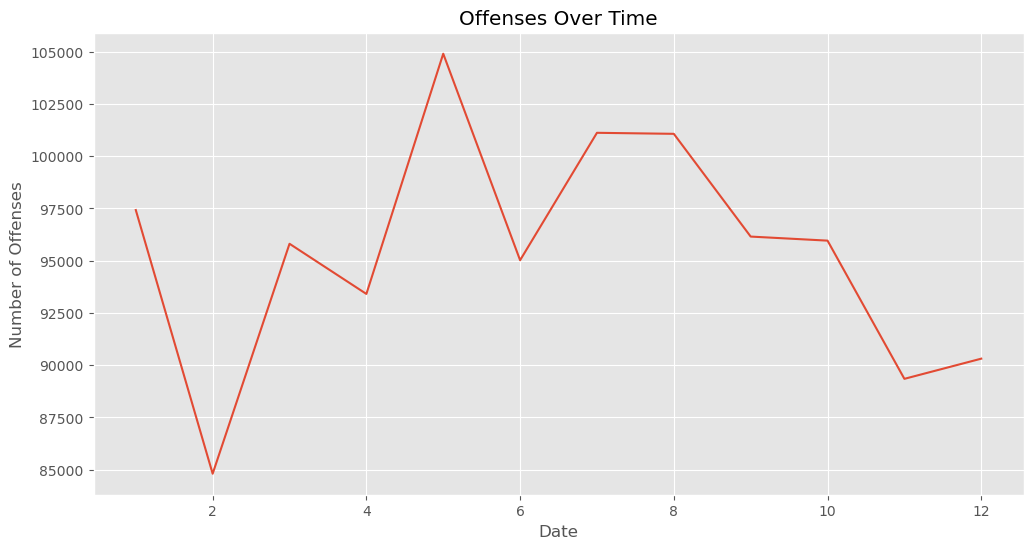

In [38]:
# Plot the number of offenses over time
plt.figure(figsize=(12, 6))
df['Month'].value_counts().sort_index().plot()
plt.title('Offenses Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Offenses')
plt.grid(True)
plt.show()

### **3.3 Offense Types Distribution** <a id="Offense-Types-Distribution"></a>
The below shows the different types of offenses

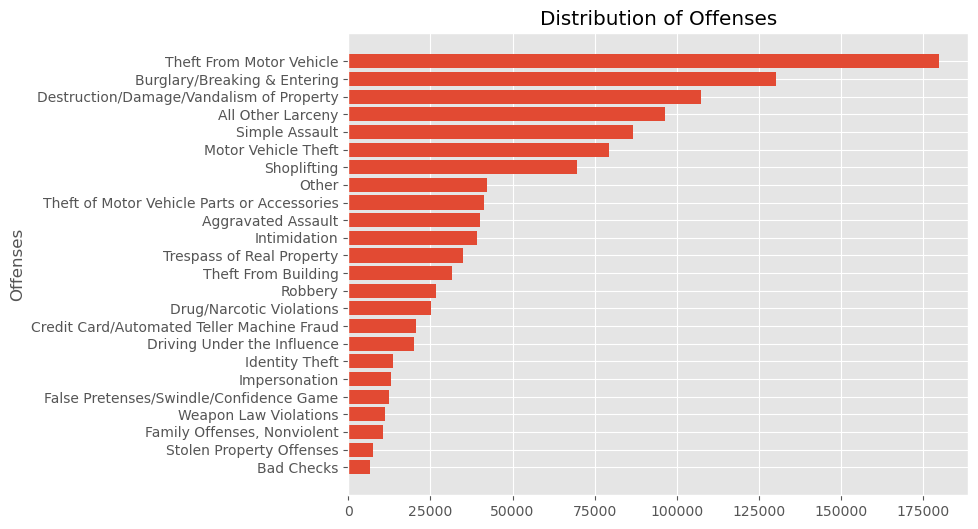

In [27]:
# Categorize offenses less than threshold to be 'Other'
threshold = 6000
offense_count = df['Offense'].value_counts()
offense_count

# Categorize offenses to 'Other' if lower than threshold
def categorize_offense(offense):
    return 'Other' if offense_count[offense] < threshold else offense

df['Simplified Offense'] = df['Offense'].apply(categorize_offense)

offense_types = df['Simplified Offense'].value_counts().reset_index().sort_values(by='count', ascending=True)

# Get the unique offenses from the filtered DataFrame
other_offense_list = df[df['Simplified Offense'] == 'Other']['Offense'].unique().tolist()

# List of offenses that are categorized into 'Other'
# print(other_offense_list)    # Uncomment for printed list

# Plot
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.barh(offense_types['Simplified Offense'], offense_types['count'])
plt.title('Distribution of Offenses')
plt.ylabel('Offenses')
plt.show()

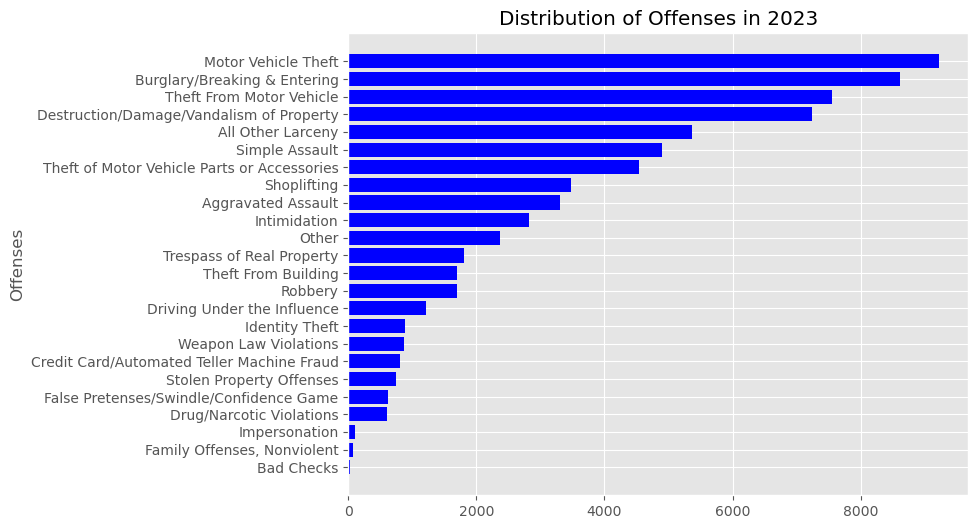

In [12]:
df_2023 = df[df['Offense Start DateTime'].dt.year == 2023]
offense_types_2023 = df_2023['Simplified Offense'].value_counts().reset_index().sort_values(by='count', ascending=True)

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.barh(offense_types_2023['Simplified Offense'], offense_types_2023['count'], color='blue')
plt.title('Distribution of Offenses in 2023')
plt.ylabel('Offenses')
plt.show()

___
## **4. Grouping and Aggregating Data** <a id="Grouping-and-Aggregating_Data"></a>
In this section, we will identify most frequent offense types. 

### **4.1 Most Common Offense Types** <a id="Most-Common-Offense-Types"></a>
The below shows the most common offense types in Seattle

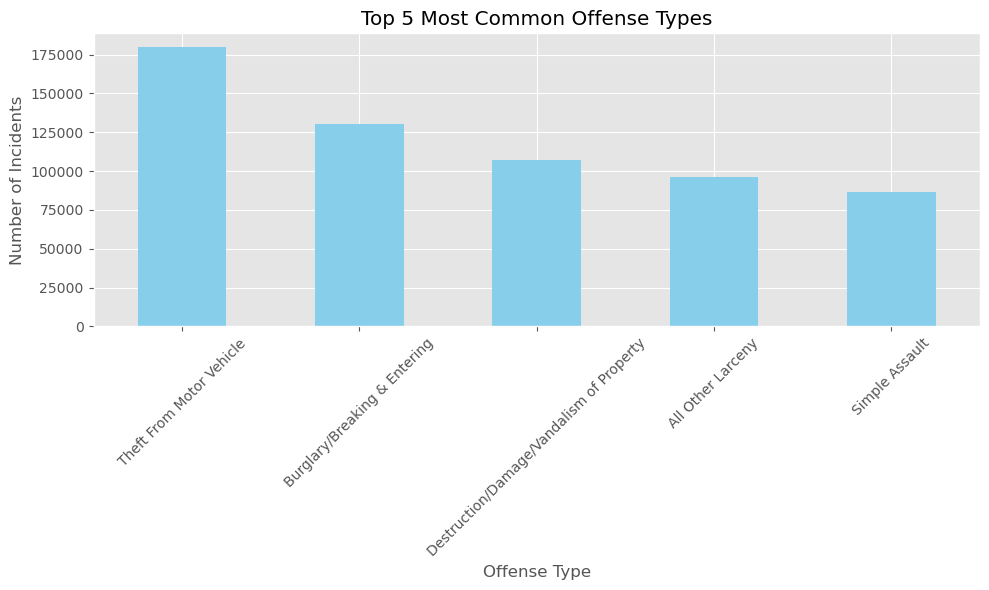

In [42]:
# Assuming df is your crime dataset and 'Offense' is the column for crime types
# Group by 'Offense' and count the number of occurrences for each type
offense_type_counts = df['Offense'].value_counts()

# Plot the most common crime types
plt.figure(figsize=(10, 6))
offense_type_counts[:5].plot(kind='bar', color='skyblue')  # Top 5 most common crimes
plt.title('Top 5 Most Common Offense Types')
plt.xlabel('Offense Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **4.2 Offenses by Neighborhood** <a id="Offenses-by-Neighborhood"></a>
The below shows the offenses categorized by neighborhood